In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("housing_in_london_monthly_variables.csv",parse_dates=["date"])
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [5]:
df.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='date', length=13549, freq=None)

In [6]:
df.count()

area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
borough_flag     13549
dtype: int64

In [7]:
df.dtypes

area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
borough_flag       int64
dtype: object

In [15]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

In [16]:
hs_n = df["houses_sold"].mean()
n_c = df["no_of_crimes"].mean()

df = df.fillna({"houses_sold" : hs_n, "no_of_crimes" : n_c})
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,2158.352063,1
1,1995-02-01,city of london,82203,E09000001,7.0,2158.352063,1
2,1995-03-01,city of london,79121,E09000001,14.0,2158.352063,1
3,1995-04-01,city of london,77101,E09000001,7.0,2158.352063,1
4,1995-05-01,city of london,84409,E09000001,10.0,2158.352063,1


In [17]:
df["Day"] = df.date.dt.day
df["Month"] = df.date.dt.month
df["Year"] = df.date.dt.year
df.drop(["date"],axis="columns",inplace = True)
df.head()

,area,average_price,code,houses_sold,no_of_crimes,borough_flag,Day,Month,Year
0,city of london,91449,E09000001,17.0,2158.352063,1,1,1,1995
1,city of london,82203,E09000001,7.0,2158.352063,1,1,2,1995
2,city of london,79121,E09000001,14.0,2158.352063,1,1,3,1995
3,city of london,77101,E09000001,7.0,2158.352063,1,1,4,1995
4,city of london,84409,E09000001,10.0,2158.352063,1,1,5,1995


In [18]:
from sklearn.preprocessing import LabelEncoder

area = LabelEncoder()
code = LabelEncoder()

df["area_n"] = area.fit_transform(df["area"])
df["code_n"] = code.fit_transform(df["code"])
df.drop(["area","code"],axis="columns",inplace=True)
df.head()

,average_price,houses_sold,no_of_crimes,borough_flag,Day,Month,Year,area_n,code_n
0,91449,17.0,2158.352063,1,1,1,1995,6,0
1,82203,7.0,2158.352063,1,1,2,1995,6,0
2,79121,14.0,2158.352063,1,1,3,1995,6,0
3,77101,7.0,2158.352063,1,1,4,1995,6,0
4,84409,10.0,2158.352063,1,1,5,1995,6,0


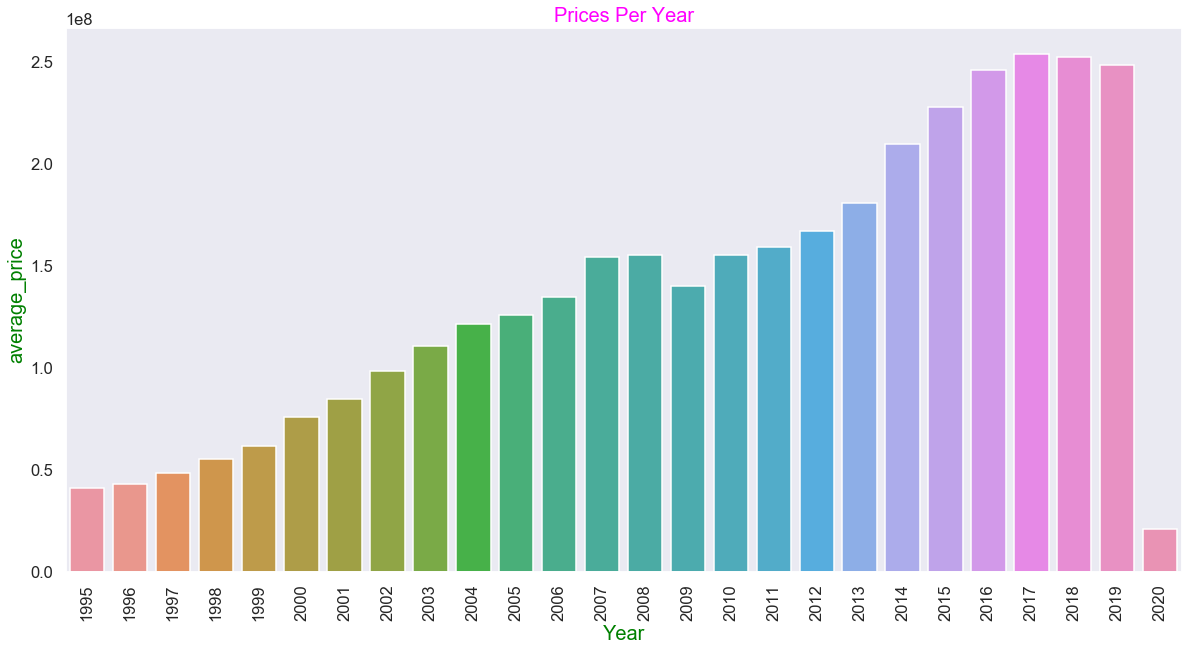

In [20]:
no_house_sold = df.groupby("Year").sum()["average_price"].reset_index()

plt.figure(figsize=[20,10])
plt.xticks(rotation=90)
plt.xlabel("Year",fontsize=20,color = "g")
plt.ylabel("average_price in $",fontsize=20,color="g")
plt.title("Prices Per Year",color="magenta",fontsize=20)
sns.barplot("Year","average_price",data = no_house_sold)
sns.set_context("talk")
sns.set_style("dark")
plt.show()

In [23]:
X = df.drop(["average_price"],axis="columns")
X.head()

,houses_sold,no_of_crimes,borough_flag,Day,Month,Year,area_n,code_n
0,17.0,2158.352063,1,1,1,1995,6,0
1,7.0,2158.352063,1,1,2,1995,6,0
2,14.0,2158.352063,1,1,3,1995,6,0
3,7.0,2158.352063,1,1,4,1995,6,0
4,10.0,2158.352063,1,1,5,1995,6,0


In [24]:
y = df["average_price"]
y.head()

0    91449
1    82203
2    79121
3    77101
4    84409
Name: average_price, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import seaborn as sns

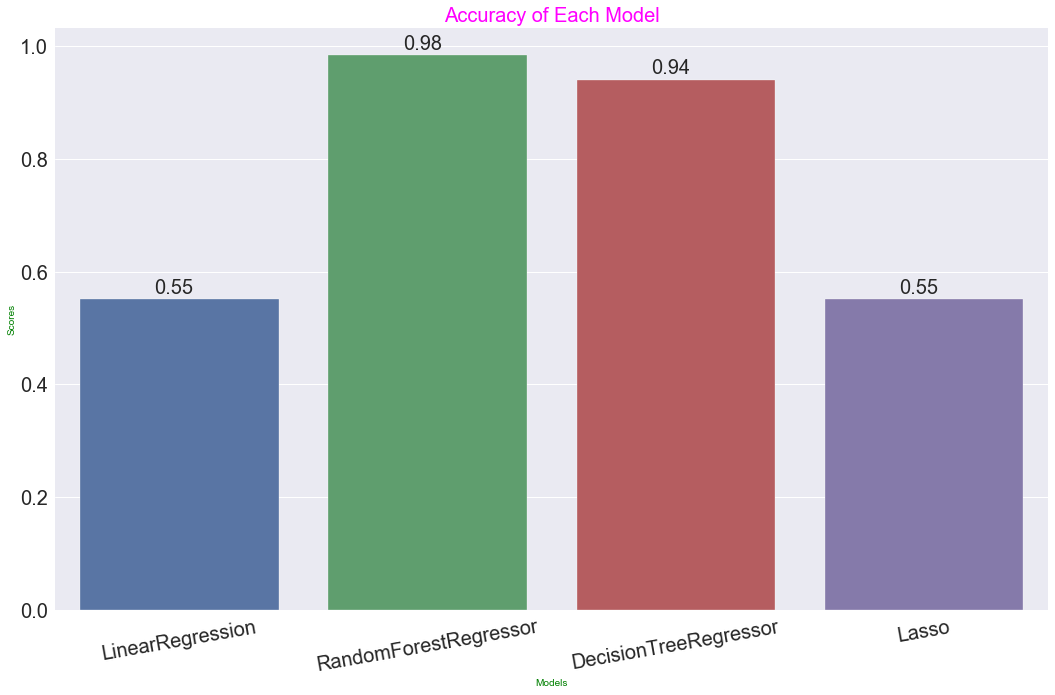

,Models,Scores
0,LinearRegression,0.551260
1,RandomForestRegressor,0.983105
2,DecisionTreeRegressor,0.940233
3,Lasso,0.551260


In [27]:
reg = LinearRegression()
forest = RandomForestRegressor()
tree = DecisionTreeRegressor()
la = Lasso()

reg.fit(X_train,y_train)
forest.fit(X_train,y_train)
tree.fit(X_train,y_train)
la.fit(X_train,y_train)

pd1 = reg.predict(X_test)
pd2 = forest.predict(X_test)
pd3 = tree.predict(X_test)
pd4 = la.predict(X_test)

s1 = r2_score(y_test,pd1)
s2 = r2_score(y_test,pd2)
s3 = r2_score(y_test,pd3)
s4 = r2_score(y_test,pd4)

Scores = [s1,s2,s3,s4]
Models = ["LinearRegression","RandomForestRegressor","DecisionTreeRegressor","Lasso"]

plt.figure(figsize=[15,10])
plt.style.use('seaborn')
plt.xticks(rotation=10,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Models",color='g',fontsize=10)
plt.ylabel("Scores",color='g',fontsize=10)
plt.title("Accuracy of Each Model",color="magenta",fontsize=20)
sns.barplot(Models,Scores)
sns.set_context("talk")
sns.set_style("dark")

for i,v in enumerate(Scores):
    plt.text(i-.10,v+.01,format(Scores[i],'.2f'),fontsize=20)
    
plt.tight_layout()
plt.show()
    
data = {"Models" : ["LinearRegression","RandomForestRegressor","DecisionTreeRegressor","Lasso"],
       "Scores" : [s1,s2,s3,s4] }

df = pd.DataFrame(data)
df

#    RandomForestRegressor will Give 99% Accuracy.